In [1]:
from google.colab import drive  
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import median_absolute_error
from sklearn.preprocessing import StandardScaler
import time
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Carga de los datos**

In [4]:
#Cargado de los datos
PATH = "/content/gdrive/MyDrive/proyecto-integrador-grupo1/proyecto-integrador-data/marketing_campaign_clustered.csv"


In [5]:
NUMERIC_CLUSTERING_FIELDS = ['User_Age', 'Income', 'Child_Count', 'Day_Cnt',
                                'Recency', 'Purchases_Z1', 'Purchases_Z2', 
                                'Purchases_Z3']

BINARY_CLUSERTING_FIELDS = ['Marital_Status_Joined', 'Education_Graduate', 
                            'Education_Postgraduate', 'AcceptedCmp3', 
                            'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 
                            'AcceptedCmp2', 'Complain','Response','Clusters']

OMITTED_FIELDS = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                  'MntSweetProducts', 'MntGoldProds', 'Spent']

CLUSTERING_FIELDS = NUMERIC_CLUSTERING_FIELDS + BINARY_CLUSERTING_FIELDS

full_df = pd.read_csv(PATH, index_col=0)



In [6]:
full_df.head()

,User_Age,Income,Child_Count,Day_Cnt,Recency,Marital_Status_Joined,Education_Graduate,Education_Postgraduate,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent,Purchases_Z1,Purchases_Z2,Purchases_Z3,Clusters
0,57,58138.0,0,663.0,58,0,1,0,635,88,...,0,0,0,0,1,1617,-1.356723,1.065805,0.125977,5
1,60,46344.0,2,113.0,38,0,1,0,11,1,...,0,0,0,0,0,27,1.382012,-0.826501,0.548390,4
2,49,71613.0,0,312.0,26,1,1,0,426,49,...,0,0,0,0,0,776,-1.455412,0.076022,-1.369982,1
3,30,26646.0,1,139.0,26,1,1,0,11,4,...,0,0,0,0,0,53,1.258620,-0.358916,0.005120,3
4,33,58293.0,1,161.0,94,1,0,1,173,43,...,0,0,0,0,0,422,-0.269030,1.095667,0.770477,5


In [7]:
full_df.shape

(1924, 26)

### **Variables independientes**

In [8]:
num_cluster_df = full_df[NUMERIC_CLUSTERING_FIELDS]
scaler = StandardScaler()
scaler.fit(num_cluster_df)

num_cluster_df = scaler.transform(num_cluster_df)
num_cluster_df = pd.DataFrame(num_cluster_df)
num_cluster_df.columns = NUMERIC_CLUSTERING_FIELDS

df = pd.concat(
    [num_cluster_df, full_df[BINARY_CLUSERTING_FIELDS]], axis=1)

df.head()

,User_Age,Income,Child_Count,Day_Cnt,Recency,Purchases_Z1,Purchases_Z2,Purchases_Z3,Marital_Status_Joined,Education_Graduate,Education_Postgraduate,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Clusters
0,1.007629,0.500913,-1.257809,1.534232,0.320574,-1.119809,0.963413,0.248096,0,1,0,0,0,0,0,0,0,1,5
1,1.263009,-0.111161,1.398639,-1.176232,-0.372909,0.826723,-0.774694,0.939452,0,1,0,0,0,0,0,0,0,0,4
2,0.326614,1.200225,-1.257809,-0.195537,-0.788999,-1.189952,0.054285,-2.200314,1,1,0,0,0,0,0,0,0,0,1
3,-1.290795,-1.133429,0.070415,-1.048101,-0.788999,0.739024,-0.345211,0.050292,1,1,0,0,0,0,0,0,0,0,3
4,-1.035415,0.508957,0.070415,-0.939682,1.568843,-0.346741,0.990842,1.302939,1,0,1,0,0,0,0,0,0,0,5


In [9]:
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"] \
                            + df["AcceptedCmp3"]+ df["AcceptedCmp4"] \
                            + df["AcceptedCmp5"]

In [10]:
df.columns

Index(['User_Age', 'Income', 'Child_Count', 'Day_Cnt', 'Recency',
       'Purchases_Z1', 'Purchases_Z2', 'Purchases_Z3', 'Marital_Status_Joined',
       'Education_Graduate', 'Education_Postgraduate', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Clusters', 'Total_Promos'],
      dtype='object')

In [11]:
df.head()

,User_Age,Income,Child_Count,Day_Cnt,Recency,Purchases_Z1,Purchases_Z2,Purchases_Z3,Marital_Status_Joined,Education_Graduate,Education_Postgraduate,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Clusters,Total_Promos
0,1.007629,0.500913,-1.257809,1.534232,0.320574,-1.119809,0.963413,0.248096,0,1,0,0,0,0,0,0,0,1,5,0
1,1.263009,-0.111161,1.398639,-1.176232,-0.372909,0.826723,-0.774694,0.939452,0,1,0,0,0,0,0,0,0,0,4,0
2,0.326614,1.200225,-1.257809,-0.195537,-0.788999,-1.189952,0.054285,-2.200314,1,1,0,0,0,0,0,0,0,0,1,0
3,-1.290795,-1.133429,0.070415,-1.048101,-0.788999,0.739024,-0.345211,0.050292,1,1,0,0,0,0,0,0,0,0,3,0
4,-1.035415,0.508957,0.070415,-0.939682,1.568843,-0.346741,0.990842,1.302939,1,0,1,0,0,0,0,0,0,0,5,0


In [12]:
df.shape

(1924, 20)

Las columnas asociadas a nuestro dataframe con las variables independientes posee las siguientes columnas

In [13]:
df.columns

Index(['User_Age', 'Income', 'Child_Count', 'Day_Cnt', 'Recency',
       'Purchases_Z1', 'Purchases_Z2', 'Purchases_Z3', 'Marital_Status_Joined',
       'Education_Graduate', 'Education_Postgraduate', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Clusters', 'Total_Promos'],
      dtype='object')

Añadiremos una columna de datos aleatorios para comparar el desempeño con el resto de características

In [14]:
df["aleatoria"] = np.random.rand(df.shape[0],1)
df.head()

,User_Age,Income,Child_Count,Day_Cnt,Recency,Purchases_Z1,Purchases_Z2,Purchases_Z3,Marital_Status_Joined,Education_Graduate,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Clusters,Total_Promos,aleatoria
0,1.007629,0.500913,-1.257809,1.534232,0.320574,-1.119809,0.963413,0.248096,0,1,...,0,0,0,0,0,0,1,5,0,0.084962
1,1.263009,-0.111161,1.398639,-1.176232,-0.372909,0.826723,-0.774694,0.939452,0,1,...,0,0,0,0,0,0,0,4,0,0.518452
2,0.326614,1.200225,-1.257809,-0.195537,-0.788999,-1.189952,0.054285,-2.200314,1,1,...,0,0,0,0,0,0,0,1,0,0.987922
3,-1.290795,-1.133429,0.070415,-1.048101,-0.788999,0.739024,-0.345211,0.050292,1,1,...,0,0,0,0,0,0,0,3,0,0.228963
4,-1.035415,0.508957,0.070415,-0.939682,1.568843,-0.346741,0.990842,1.302939,1,0,...,0,0,0,0,0,0,0,5,0,0.662037


In [15]:
df.columns = ['User_Age', 'Income', 'Child_Count', 'Day_Cnt', 'Recency',
       'Purchases_Z1', 'Purchases_Z2', 'Purchases_Z3', 'Marital_Status_Joined',
       'Education_Graduate', 'Education_Postgraduate', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'cluster', 'Total_Promos', 'aleatoria']

### **Variables dependientes**

Ahora cargamos las variables que buscaremos predecir con nuestros modelos

In [16]:
df2 = full_df[OMITTED_FIELDS]
df2.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Spent
0,635,88,546,172,88,88,1617
1,11,1,6,2,1,6,27
2,426,49,127,111,21,42,776
3,11,4,20,10,3,5,53
4,173,43,118,46,27,15,422


In [17]:
df2.shape

(1924, 7)

Donde además añadimos la columna **spent**, la cual venía en nuestro dataframe inicial.

## **Funciones**

A continuación tenemos unas funciones usadas para alcanzar nuestro objetivo.

In [18]:
def linear_models(model, x_train, x_test, y_train, y_test, name):
  """
  Realiza el fit de nuestros datos al modelo lineal pasado, adicional a esto regresa los
  plots de los residuos, del valor real contra el predicho y del valor de los coeficientes
  asociados al modelo lineal.

  Atributos :
  ----------

  model : 
    Modelo lineal ha usar
  x_train : 
    Datos de entrenamientos, variables independientes
  x_test :
    Datos de test, variables independientes
  y_train : 
    Datos de entrenamientos, variable dependiente
  y_test :
    Datos de test, variable dependiente

  Return :
  -------
  
  Regresa las gráficas y el modelo adopatado
  """
  model = model
  model.fit(x_train, y_train)
  print(f" R2 para la regresión {name} = {model.score(x_test, y_test)} \n\n")
  y_lin = model.predict(x_test)
  grby = pd.DataFrame(data = {"Clusters":x_test.cluster, "Predicción ventas totales": y_lin}).reset_index(drop = True).groupby(by =["Clusters"]).sum().round(2)
  print("### La siguiente es la distribucción por clusters para la predicción de las ventas \n\n")
  print(grby, "\n\n")
  fig, ax = plt.subplots(1,3,figsize=(20,5))
  sns.distplot((y_test - y_lin), bins = 50, ax=ax[0])
  ax[1].scatter(y_test, y_lin, color = "green")
  ax[2].plot(model.coef_,'-r', label = "Coeficientes linear", linestyle = "--")
  ax[0].set(title=f'Distibución de los residuos {name}');
  ax[1].set( xlabel='y-test', ylabel='y - predicho',
                   title=f'Valor Real vs Valor Predicho {name}');
  ax[2].set( xlabel=f'Coeficientes {name}', ylabel='Valor coeficiente',
                   title= f'Valor coeficientes modelo {name}');
  plt.show()
  mae = median_absolute_error(y_test, y_lin)
  print(f" Error medio absoluto de {name} : {mae} \n")
  return model

In [19]:
def coef_aporte(model, atributos, name, model_type = "linear"):
  """
  Regresa el gráfico de los coeficientes para el caso de la regresión lineal, para 
  el RandomForest devuelve el gráfico de importancia de las variables independientes.

  Atributos :
  ----------

  model :
    Modelo adpatado a los datos.
  atributos :
    Nombre de los atributos asociados a nuestros datos
  name :
    Nombre asiganado al modelo usado
  model_type :
    Tipo de modelo usado (linear o tree)
  """
  if model_type == "linear":
    coefs = model.coef_
  elif model_type == "tree":
    coefs = model.feature_importances_
  atributos = pd.DataFrame(coefs, columns = ["Coeficientes"], index = atributos).sort_values("Coeficientes", ascending= False)
  print(atributos, "\n")
  atributos.plot.barh(figsize=(9, 7))
  plt.title(f"{name}")
  plt.axvline(x=0, color=".5")
  plt.xlabel("Valores para los ceficientes")
  plt.subplots_adjust(left=0.3)
  plt.show()

In [20]:
def best_tree(model, range_iter, x_train, y_train, x_test, y_test, columnas, m_type = "tree"):
  """
  Itera sobre rango de valores para el depth del modelo de RandomForest, luego hace
  un fit del mejor modelo y regresa el r2 asociado, al igual que la importancia 
  asociada a las caracteristicas.

  Atributos : 
  ----------

  model : 
    Modelo RandomForest
  range_iter : 
    Rango de iteración para el hiperparámetro depth
  x_train : 
    Datos de entrenamientos, variables independientes
  x_test :
    Datos de test, variables independientes
  y_train : 
    Datos de entrenamientos, variable dependiente
  y_test :
    Datos de test, variable dependiente
  columnas :
    Nombre de los atributos asociados a nuestros datos
  m_type :
    Tipo de modelo usado (linear o tree)


  Nota :
  ------
  Al quitar los comentarios de la función tenemos otros valores de importancia al
  modelo-
  """
  tuned_parameters = [{'max_depth': range_iter}]
  clf = GridSearchCV(model, tuned_parameters, cv=5,scoring= 'r2')
  clf.fit(x_train, y_train)
  print(f"Mejor conjunto de parámetros: {clf.best_params_}")
  # Las siguientes lineas son opcionales
  #print("Media y desviación: \n")
  #means = clf.cv_results_['mean_test_score']
  #stds = clf.cv_results_['std_test_score']
  #for mean, std, params in zip(means, stds, clf.cv_results_['params']):
   # print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
  best_model = clf.best_estimator_
  y_lin = best_model.predict(x_test)
  grby = pd.DataFrame(data = {"Clusters":x_test.cluster, "Predicción ventas totales": y_lin}).reset_index(drop = True).groupby(by =["Clusters"]).sum().round(2)
  print(f"R2 para random forest: {best_model.score(x_test, y_test)}")
  print("### La siguiente es la distribucción por clusters para la predicción de las ventas \n\n")
  print(grby, "\n\n")
  coef_aporte(best_model, columnas, "Aporte coeficientes", model_type = m_type)
  

## Tomemos **MntWines**


Veamos a modo de ejmplo lo que sucede para el caso MntWines

In [21]:
y = df2.MntWines
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.3, random_state = 30)

In [22]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1346, 21) (578, 21) (1346,) (578,)


 R2 para la regresión Regresión Lasso = 0.740522758320687 


### La siguiente es la distribucción por clusters para la predicción de las ventas 


          Predicción ventas totales
Clusters                           
0                           6138.30
1                          34963.79
2                          20252.11
3                           3856.14
4                           1004.62
5                          92188.58 




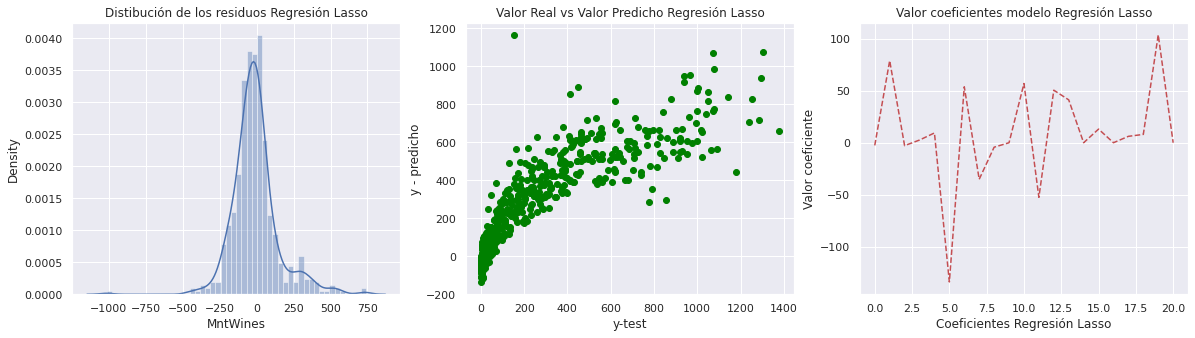

 Error medio absoluto de Regresión Lasso : 69.18178248118217 

                        Coeficientes
Total_Promos              103.783956
Income                     78.957244
Education_Postgraduate     56.953619
Purchases_Z2               53.797221
AcceptedCmp4               50.557223
AcceptedCmp5               41.236598
AcceptedCmp2               13.101686
Recency                     9.396198
cluster                     7.995031
Response                    6.143920
Day_Cnt                     2.586191
Complain                   -0.000000
AcceptedCmp1               -0.000000
aleatoria                  -0.000000
Education_Graduate         -0.000000
User_Age                   -2.583199
Child_Count                -2.817808
Marital_Status_Joined      -4.311517
Purchases_Z3              -35.185654
AcceptedCmp3              -52.537932
Purchases_Z1             -133.952203 



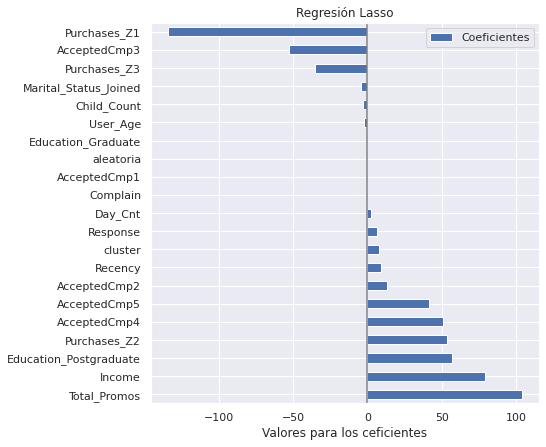

In [23]:
lin_models = {"Regresión Lasso" : Lasso(alpha=0.9)}

for name, model in lin_models.items():
  model_reg = linear_models(model, X_train, X_test, y_train, y_test, name)
  coef_aporte(model_reg, df.columns, name)

Mejor conjunto de parámetros: {'max_depth': 13}
R2 para random forest: 0.7778642365797519
### La siguiente es la distribucción por clusters para la predicción de las ventas 


          Predicción ventas totales
Clusters                           
0                           7021.72
1                          34965.19
2                          14365.49
3                           2410.76
4                           2394.94
5                          92125.03 


                        Coeficientes
Purchases_Z1                0.632300
Income                      0.090152
Total_Promos                0.060413
Purchases_Z2                0.053832
Purchases_Z3                0.027665
Day_Cnt                     0.022747
User_Age                    0.021549
Education_Postgraduate      0.020397
Recency                     0.019538
aleatoria                   0.017800
AcceptedCmp5                0.005820
Child_Count                 0.005805
Response                    0.004536
AcceptedCmp4   

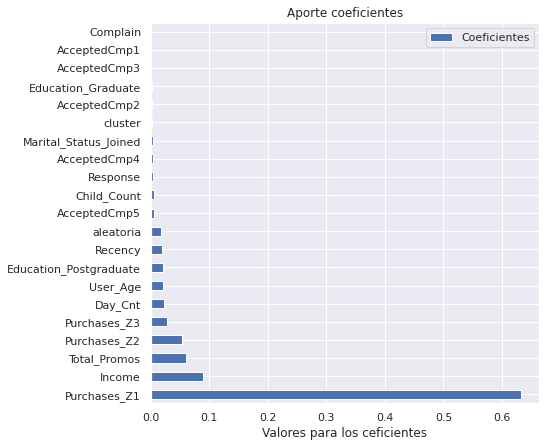

In [24]:
best_tree(RandomForestRegressor(), range(2,40), X_train, y_train, X_test, y_test, df.columns, "tree")

## **Unión de variables**


Para tener una diferencia compacta entre las variables a predecir, se decidió hacer una unión lineal (suma) de algunas de las características, creando así unas nuevas variables. Para esto, se unirá en una variable **meats**, las ventas asociadas a cárnicos, es decir, carne y productos de pescadería, de igual manera en una variable **others** se sumaron  los productos relacionados a frutas, pastelería y elementos de Oro. De esta manera, quedamos con cuatro variables a predecir:

* Spent
* MntWines
* Meats
* Others


Además se usará el modelo de regresión lineal de tipo **Lasso**, esto por su característica de ser un [modelo de selección de características](https://ieeexplore.ieee.org/document/7887916), al igual que el **RandomForestRegressor**.

## **Creamos una nueva variable** 

La asociamos con los valores diferentes a **spent** y **MntWines**

In [25]:
df2["others"] = df2['MntFruits'] + df2['MntGoldProds'] + df2['MntSweetProducts']
df2["meats"] = df2['MntMeatProducts'] + df2['MntFishProducts']

In [26]:
df2.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Spent,others,meats
0,635,88,546,172,88,88,1617,264,718
1,11,1,6,2,1,6,27,8,8
2,426,49,127,111,21,42,776,112,238
3,11,4,20,10,3,5,53,12,30
4,173,43,118,46,27,15,422,85,164


In [27]:
df2 = df2[["Spent", "MntWines", "meats","others"]]
df2.head()

,Spent,MntWines,meats,others
0,1617,635,718,264
1,27,11,8,8
2,776,426,238,112
3,53,11,30,12
4,422,173,164,85


### **Corremos el proceso para estas variables**

## INICIAMOS EL PROCESO PARA EL CASO : Spent 


(1346, 21) (578, 21) (1346,) (578,)
## INICIAMOS EL FIT CON LAS REGRESIONES 


 R2 para la regresión Regresión Lasso = 0.8057764032377864 


### La siguiente es la distribucción por clusters para la predicción de las ventas 


          Predicción ventas totales
Clusters                           
0                          14830.39
1                          59172.76
2                          29522.33
3                           9907.83
4                           5676.42
5                         174761.00 




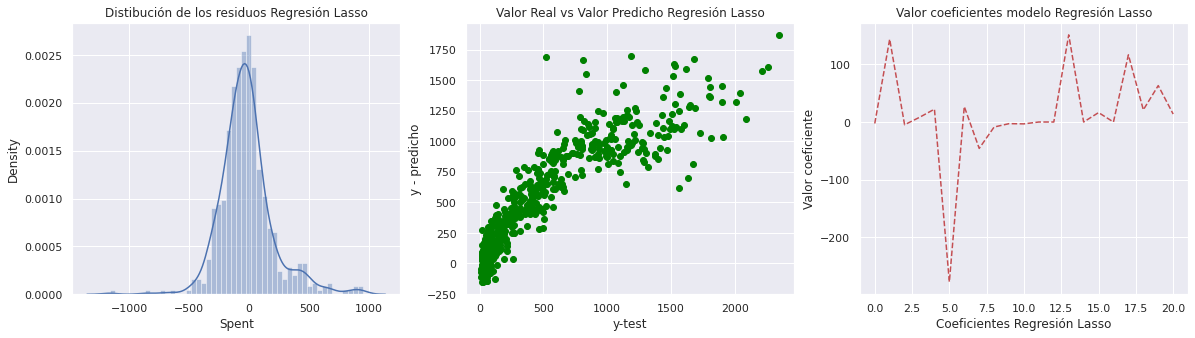

 Error medio absoluto de Regresión Lasso : 113.0773502789238 

                        Coeficientes
AcceptedCmp5              151.439279
Income                    143.860752
Response                  116.754180
Total_Promos               63.262322
Purchases_Z2               26.842493
Recency                    22.284450
cluster                    21.096216
AcceptedCmp2               16.344633
aleatoria                  13.798681
Day_Cnt                     8.140402
AcceptedCmp1                0.000000
Complain                   -0.000000
AcceptedCmp3               -0.000000
AcceptedCmp4               -0.000000
User_Age                   -2.599666
Education_Graduate         -2.879155
Education_Postgraduate     -3.252463
Child_Count                -4.777682
Marital_Status_Joined      -8.748980
Purchases_Z3              -45.900400
Purchases_Z1             -277.962392 



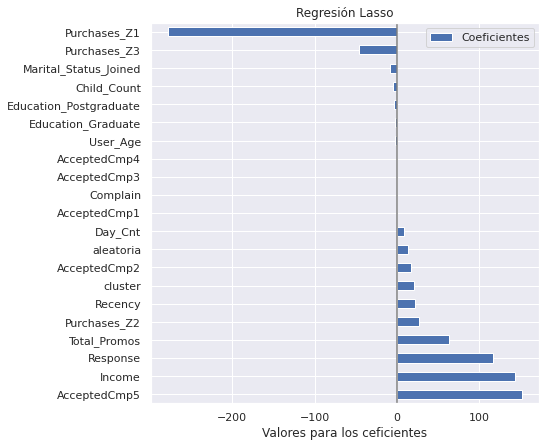

## TERMINAMOS EL FIT CON LAS REGRESIONES 


## INICIAMOS EL FIT CON EL RANDOMFOREST 


Mejor conjunto de parámetros: {'max_depth': 16}
R2 para random forest: 0.8488315205147742
### La siguiente es la distribucción por clusters para la predicción de las ventas 


          Predicción ventas totales
Clusters                           
0                          13743.70
1                          58884.47
2                          26312.60
3                           5667.77
4                           6825.99
5                         178370.37 


                        Coeficientes
Purchases_Z1                0.734639
Income                      0.132640
Purchases_Z2                0.030699
Purchases_Z3                0.015576
User_Age                    0.013232
Day_Cnt                     0.012964
aleatoria                   0.012776
Recency                     0.012211
Total_Promos                0.012092
Response                    0.004647
Education_Postgraduate      0.003591
Ch

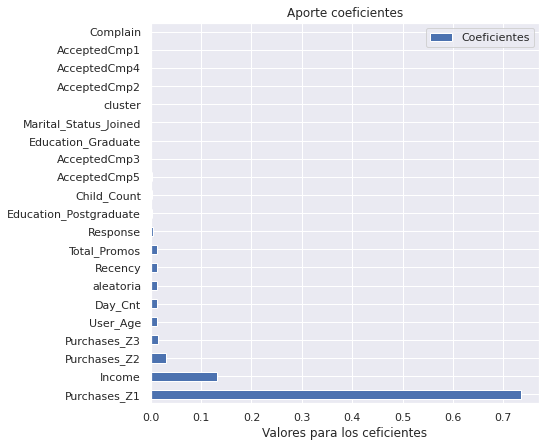

## TERMINAMOS EL FIT CON EL RANDOMFOREST 


## INICIAMOS EL PROCESO PARA EL CASO : MntWines 


(1346, 21) (578, 21) (1346,) (578,)
## INICIAMOS EL FIT CON LAS REGRESIONES 


 R2 para la regresión Regresión Lasso = 0.740522758320687 


### La siguiente es la distribucción por clusters para la predicción de las ventas 


          Predicción ventas totales
Clusters                           
0                           6138.30
1                          34963.79
2                          20252.11
3                           3856.14
4                           1004.62
5                          92188.58 




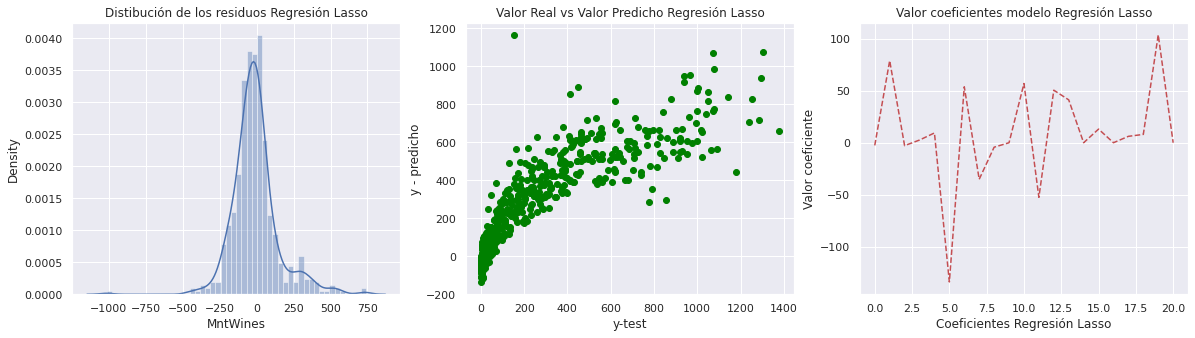

 Error medio absoluto de Regresión Lasso : 69.18178248118217 

                        Coeficientes
Total_Promos              103.783956
Income                     78.957244
Education_Postgraduate     56.953619
Purchases_Z2               53.797221
AcceptedCmp4               50.557223
AcceptedCmp5               41.236598
AcceptedCmp2               13.101686
Recency                     9.396198
cluster                     7.995031
Response                    6.143920
Day_Cnt                     2.586191
Complain                   -0.000000
AcceptedCmp1               -0.000000
aleatoria                  -0.000000
Education_Graduate         -0.000000
User_Age                   -2.583199
Child_Count                -2.817808
Marital_Status_Joined      -4.311517
Purchases_Z3              -35.185654
AcceptedCmp3              -52.537932
Purchases_Z1             -133.952203 



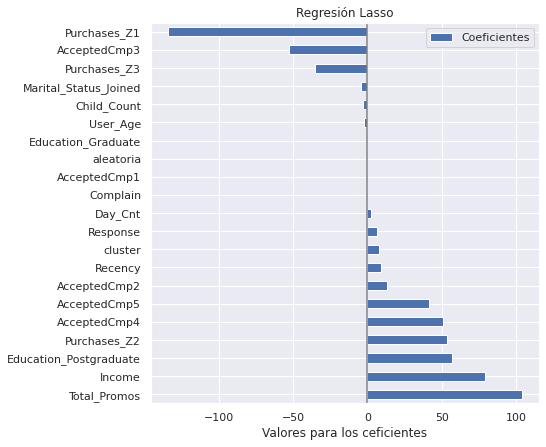

## TERMINAMOS EL FIT CON LAS REGRESIONES 


## INICIAMOS EL FIT CON EL RANDOMFOREST 


Mejor conjunto de parámetros: {'max_depth': 21}
R2 para random forest: 0.778862231480487
### La siguiente es la distribucción por clusters para la predicción de las ventas 


          Predicción ventas totales
Clusters                           
0                           6837.49
1                          34792.35
2                          14310.86
3                           2447.39
4                           2443.96
5                          92649.26 


                        Coeficientes
Purchases_Z1                0.634091
Income                      0.084478
Total_Promos                0.060406
Purchases_Z2                0.054340
Purchases_Z3                0.027063
Day_Cnt                     0.023742
User_Age                    0.021534
Education_Postgraduate      0.020602
Recency                     0.020526
aleatoria                   0.018952
Child_Count                 0.005778
Acc

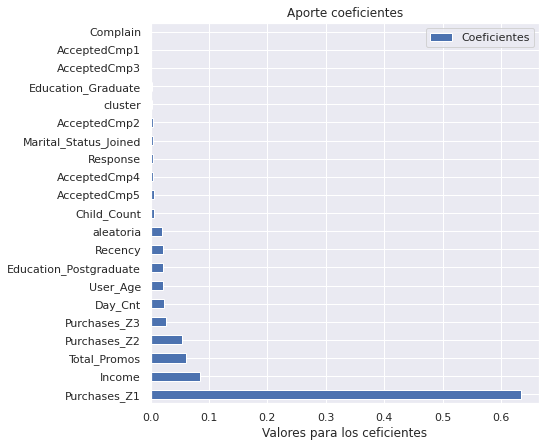

## TERMINAMOS EL FIT CON EL RANDOMFOREST 


## INICIAMOS EL PROCESO PARA EL CASO : meats 


(1346, 21) (578, 21) (1346,) (578,)
## INICIAMOS EL FIT CON LAS REGRESIONES 


 R2 para la regresión Regresión Lasso = 0.6270479906087374 


### La siguiente es la distribucción por clusters para la predicción de las ventas 


          Predicción ventas totales
Clusters                           
0                           5045.63
1                          16187.29
2                           5555.35
3                           4134.06
4                           1998.83
5                          58420.79 




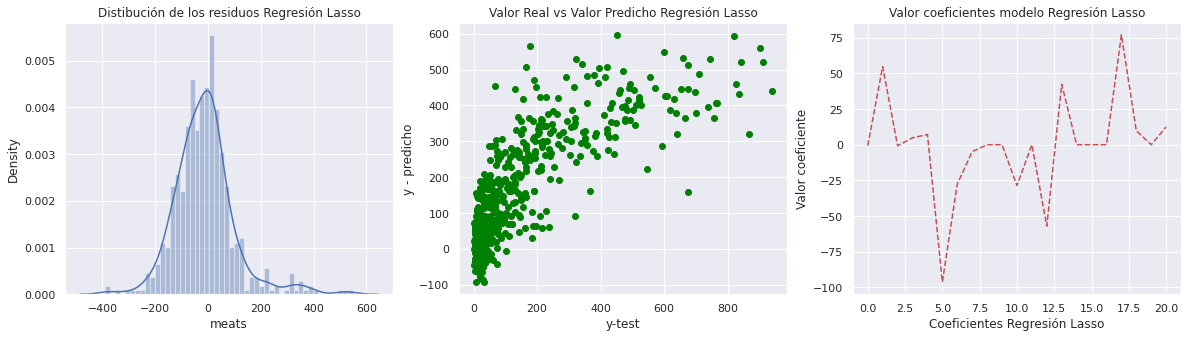

 Error medio absoluto de Regresión Lasso : 61.46806861084238 

                        Coeficientes
Response                   77.029866
Income                     54.816871
AcceptedCmp5               42.404347
aleatoria                  12.507647
cluster                     9.775106
Recency                     7.159763
Day_Cnt                     4.834095
AcceptedCmp1                0.000000
Total_Promos                0.000000
Complain                    0.000000
Marital_Status_Joined      -0.000000
Education_Graduate         -0.000000
AcceptedCmp3               -0.000000
AcceptedCmp2               -0.000000
User_Age                   -0.699178
Child_Count                -0.772218
Purchases_Z3               -4.868203
Purchases_Z2              -27.546835
Education_Postgraduate    -28.649293
AcceptedCmp4              -57.037703
Purchases_Z1              -96.236171 



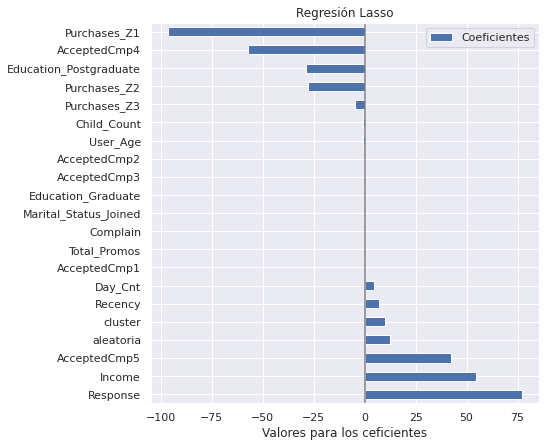

## TERMINAMOS EL FIT CON LAS REGRESIONES 


## INICIAMOS EL FIT CON EL RANDOMFOREST 


Mejor conjunto de parámetros: {'max_depth': 24}
R2 para random forest: 0.7241903347492078
### La siguiente es la distribucción por clusters para la predicción de las ventas 


          Predicción ventas totales
Clusters                           
0                           3932.56
1                          15874.14
2                           6837.76
3                           1846.67
4                           2384.42
5                          58953.62 


                        Coeficientes
Income                      0.621206
Purchases_Z1                0.156426
Purchases_Z2                0.067289
Purchases_Z3                0.026909
aleatoria                   0.023814
Recency                     0.022238
Day_Cnt                     0.021096
User_Age                    0.018898
Response                    0.006454
Child_Count                 0.006037
Total_Promos                0.005343
Ed

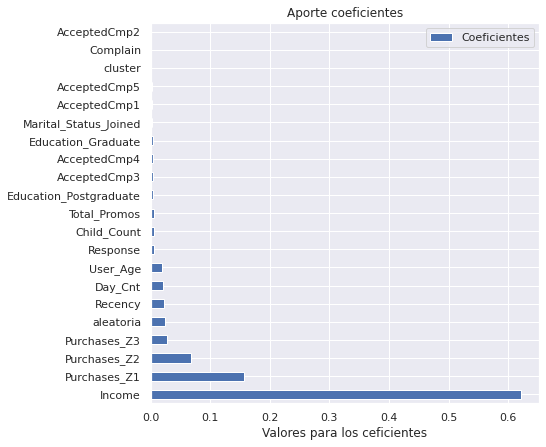

## TERMINAMOS EL FIT CON EL RANDOMFOREST 


## INICIAMOS EL PROCESO PARA EL CASO : others 


(1346, 21) (578, 21) (1346,) (578,)
## INICIAMOS EL FIT CON LAS REGRESIONES 


 R2 para la regresión Regresión Lasso = 0.5473859217064254 


### La siguiente es la distribucción por clusters para la predicción de las ventas 


          Predicción ventas totales
Clusters                           
0                           3736.36
1                           8087.83
2                           3878.15
3                           1987.17
4                           2594.29
5                          24013.12 




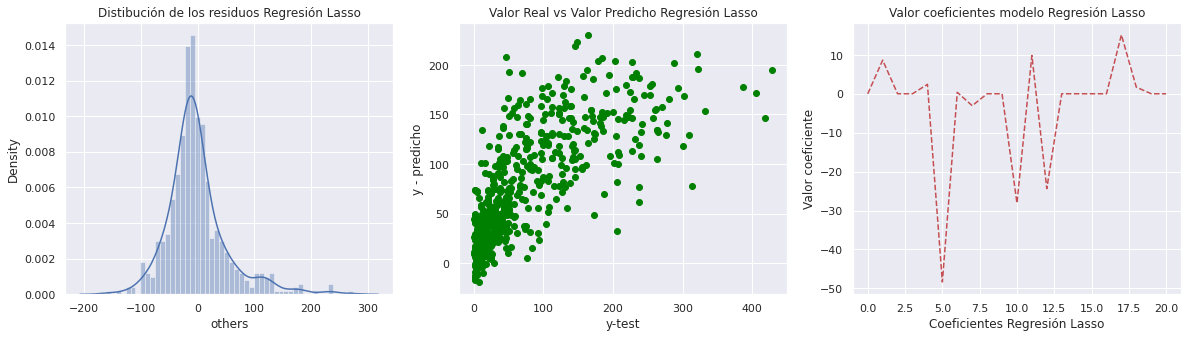

 Error medio absoluto de Regresión Lasso : 23.336302493194186 

                        Coeficientes
Response                   15.136787
AcceptedCmp3                9.842776
Income                      8.630465
Recency                     2.418291
cluster                     1.693445
Purchases_Z2                0.365936
User_Age                    0.000000
AcceptedCmp5                0.000000
Total_Promos               -0.000000
Complain                    0.000000
AcceptedCmp2               -0.000000
AcceptedCmp1               -0.000000
aleatoria                   0.000000
Education_Graduate         -0.000000
Marital_Status_Joined      -0.000000
Day_Cnt                    -0.000000
Child_Count                -0.000000
Purchases_Z3               -3.059797
AcceptedCmp4              -24.368020
Education_Postgraduate    -28.112237
Purchases_Z1              -48.349978 



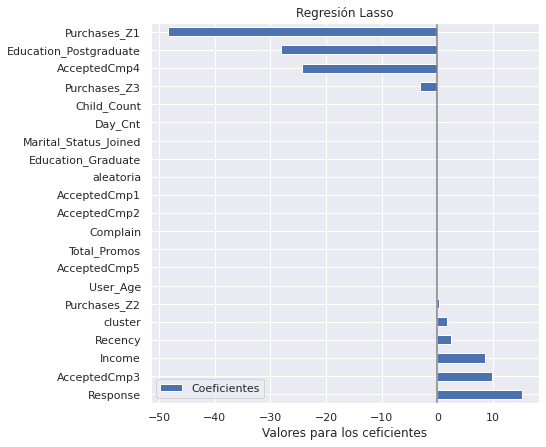

## TERMINAMOS EL FIT CON LAS REGRESIONES 


## INICIAMOS EL FIT CON EL RANDOMFOREST 


Mejor conjunto de parámetros: {'max_depth': 32}
R2 para random forest: 0.5540743178240777
### La siguiente es la distribucción por clusters para la predicción de las ventas 


          Predicción ventas totales
Clusters                           
0                           3030.61
1                           8006.83
2                           4927.18
3                           1381.23
4                           2322.41
5                          23925.95 


                        Coeficientes
Purchases_Z1                0.555245
Income                      0.074751
Purchases_Z2                0.056374
Purchases_Z3                0.051819
Education_Postgraduate      0.046051
Recency                     0.045040
Day_Cnt                     0.040050
aleatoria                   0.038556
User_Age                    0.035313
Child_Count                 0.009075
AcceptedCmp4                0.008284
Ac

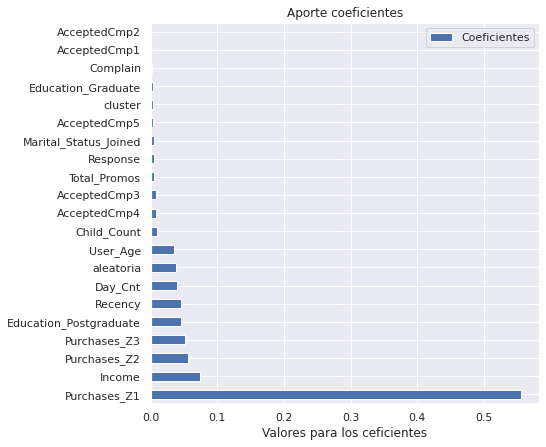

## TERMINAMOS EL FIT CON EL RANDOMFOREST 




In [28]:
for case in df2.columns:
  print(f"## INICIAMOS EL PROCESO PARA EL CASO : {case} \n\n")
  y = df2[case]
  X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.3, random_state = 30)
  print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
  print(f"## INICIAMOS EL FIT CON LAS REGRESIONES \n\n")
  lin_models = {"Regresión Lasso" : Lasso(alpha=0.9)}
  for name, model in lin_models.items():
    model_reg = linear_models(model, X_train, X_test, y_train, y_test, name)
    coef_aporte(model_reg, df.columns, name)
  print(f"## TERMINAMOS EL FIT CON LAS REGRESIONES \n\n")
  print(f"## INICIAMOS EL FIT CON EL RANDOMFOREST \n\n")
  best_tree(RandomForestRegressor(), range(2,40), X_train, y_train, X_test, y_test, df.columns, "tree")
  print(f"## TERMINAMOS EL FIT CON EL RANDOMFOREST \n\n")

Los resultados anteriores son tratados a profundidad en el documento descriotivo del proyecto.